## Adding Dependency

In [1]:
import dataframe_image as dfi
import quandl
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
from matplotlib import pyplot as plt
import math 
keras = tf.keras
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras import losses
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import yfinance as yf
import pandas_ta as ta

In [2]:
#For dataset from Yahoo Finance
data = yf.download(tickers = 'TCS.NS', start = '2014-01-01',end = '2024-01-01')

data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-01,1090.050049,1092.250000,1075.550049,1076.650024,872.926208,529952
2014-01-02,1083.000000,1094.500000,1078.074951,1083.500000,878.480103,1726948
2014-01-03,1082.349976,1114.550049,1073.625000,1111.099976,900.857544,2618174
2014-01-06,1114.500000,1122.000000,1098.500000,1119.800049,907.911560,2311810
2014-01-07,1120.000000,1128.224976,1099.500000,1103.074951,894.350952,2897486


In [3]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data['Open']
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

## Feature Selection

In [21]:
import pandas as pd

# Load the data

# Calculate correlation coefficients
correlation = data.corr()['Target'].abs().sort_values(ascending=False)
print(correlation)
# Select top k features
k = 6  # Number of top features to select
top_features = correlation.index[1:k+1]  # Exclude target variable
print("Top", k, "features:")
print(top_features)


Target             1.000000
EMAS               0.460446
TargetNextClose    0.453130
EMAM               0.439647
Adj Close          0.438499
EMAF               0.409348
Name: Target, dtype: float64
Top 6 features:
Index(['EMAS', 'TargetNextClose', 'EMAM', 'Adj Close', 'EMAF'], dtype='object')


In [5]:
data.drop(['RSI', 'Open','Low','High','TargetClass'], axis=1, inplace=True)

In [6]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data.head(20)

,Adj Close,EMAF,EMAM,EMAS,Target,TargetNextClose
0,1028.428711,1246.633369,1160.453601,1122.019830,-200.365479,1032.134521
1,1032.134521,1245.939713,1162.015906,1123.573872,-217.604004,1027.845947
2,1027.845947,1244.821640,1163.445293,1125.039118,-215.709106,1029.240845
3,1029.240845,1243.969579,1164.879544,1126.507143,-193.975342,1041.024658
4,1041.024658,1244.546288,1166.565594,1128.143141,-216.100342,1040.899658
5,1040.899658,1245.053784,1168.215285,1129.755484,-209.684570,1035.840454
6,1035.840454,1244.934381,1169.712013,1131.266008,-234.604431,1015.395569
7,1015.395569,1242.488250,1170.692963,1132.431359,-207.812317,1014.437683
8,1014.437683,1240.165557,1171.631716,1133.566043,-210.623962,1012.876038
9,1012.876038,1237.885501,1172.514751,1134.660863,-195.903198,1026.096802


## Displaying the Stock Difference of 10 Year

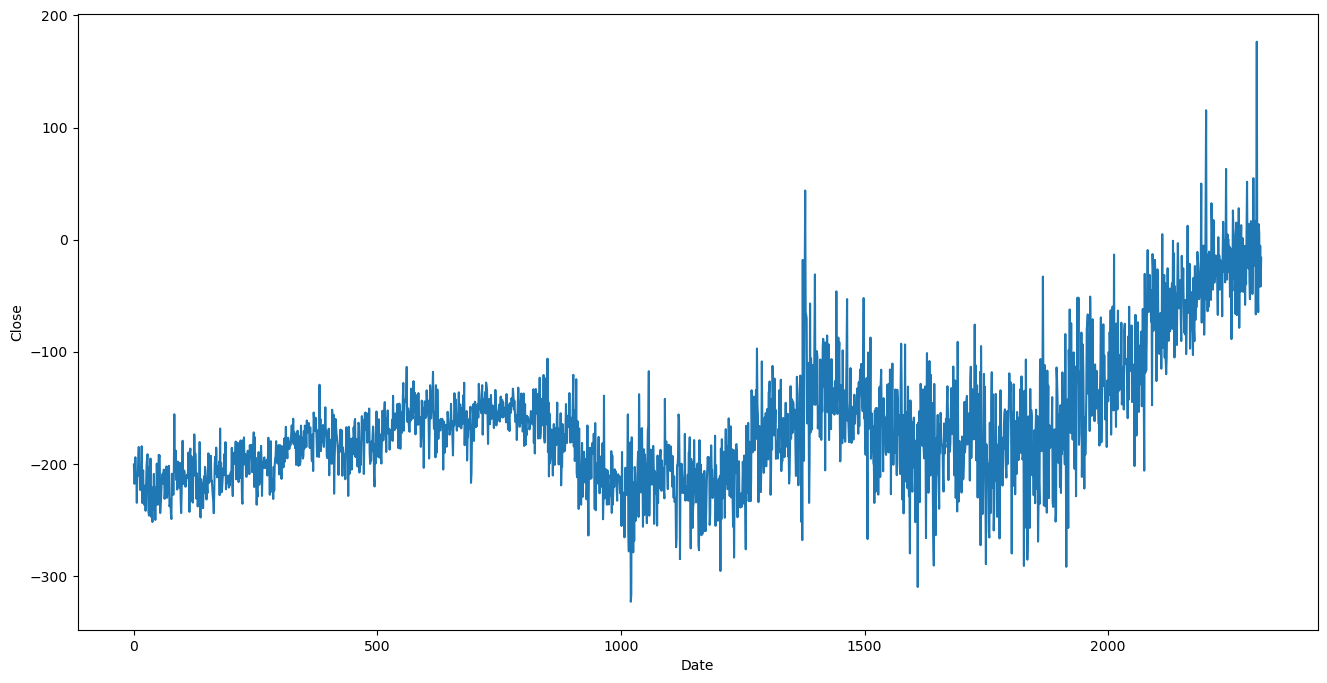

In [7]:
plt.figure(figsize=(16,8))
df=pd.DataFrame(data['Target'])
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

## Normalizing Feature

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[4.14768344e-02 5.10505358e-02 3.94042144e-04 0.00000000e+00
  2.45185737e-01 4.27387896e-02]
 [4.27387896e-02 5.07968234e-02 1.01284126e-03 6.20890587e-04
  2.10658396e-01 4.12783834e-02]
 [4.12783834e-02 5.03878763e-02 1.57899431e-03 1.20630443e-03
  2.14453718e-01 4.17533937e-02]
 ...
 [9.77814811e-01 9.43145953e-01 9.30963782e-01 9.37088417e-01
  6.35728212e-01 9.83119530e-01]
 [9.83119530e-01 9.47519528e-01 9.33326961e-01 9.38907320e-01
  5.63126859e-01 9.79289268e-01]
 [9.79289268e-01 9.51082942e-01 9.35554716e-01 9.40642334e-01
  6.14261397e-01 9.77086021e-01]]


## Spliting Data

In [9]:
X = []
backcandles = 80

# Assuming data_set_scaled has 5 columns
num_features = 5

for j in range(num_features): 
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):
        X[j].append(data_set_scaled[i-backcandles:i, j])

# Move axis from 0 to position 2
X = np.moveaxis(X, [0], [2])

X, yi = np.array(X), np.array(data_set_scaled[backcandles:,-2])
y = np.reshape(yi, (len(yi), 1))

print(X.shape)
print(y.shape)


(2235, 80, 5)
(2235, 1)


In [10]:
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

1788
(1788, 80, 5)
(447, 80, 5)
(1788, 1)
(447, 1)


## Creating model with parameter

In [11]:
model = keras.Sequential()

model.add(keras.layers.Conv1D(
    filters=64,
    kernel_size=3,  
    strides=1,
    padding='same',
    activation='relu'
))
model.add(keras.layers.MaxPooling1D(pool_size=2))

model.add(keras.layers.Conv1D(
    filters=64,
    kernel_size=3,  
    strides=1,
    padding='same',
    activation='relu'
))
model.add(keras.layers.MaxPooling1D(pool_size=2))

model.add(keras.layers.Conv1D(
    filters=64,
    kernel_size=3,  
    strides=1,
    padding='same',
    activation='relu'
))
model.add(keras.layers.MaxPooling1D(pool_size=2))

model.add(keras.layers.LSTM(64, return_sequences=True))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.LSTM(64, return_sequences=True))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.LSTM(64, return_sequences=False))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(1))

In [12]:
#compiling model using the optimizers, loss function, and metric chosen
model.compile(optimizer='Nadam', loss='mse', metrics =['mae'])

In [13]:
# fit model
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_split=0.2)

# Print training and validation loss
print("Training Loss:", history.history['loss'])
print("Validation Loss:", history.history['val_loss'])

Epoch 1/100
45/45 [==============================] - 8s 39ms/step - loss: 0.0122 - mae: 0.0768 - val_loss: 0.0136 - val_mae: 0.0924
Epoch 2/100
45/45 [==============================] - 1s 18ms/step - loss: 0.0038 - mae: 0.0458 - val_loss: 0.0085 - val_mae: 0.0713
Epoch 3/100
45/45 [==============================] - 1s 18ms/step - loss: 0.0035 - mae: 0.0438 - val_loss: 0.0129 - val_mae: 0.0888
Epoch 4/100
45/45 [==============================] - 1s 24ms/step - loss: 0.0034 - mae: 0.0434 - val_loss: 0.0115 - val_mae: 0.0836
Epoch 5/100
45/45 [==============================] - 1s 31ms/step - loss: 0.0033 - mae: 0.0427 - val_loss: 0.0091 - val_mae: 0.0739
Epoch 6/100
45/45 [==============================] - 1s 24ms/step - loss: 0.0033 - mae: 0.0417 - val_loss: 0.0119 - val_mae: 0.0846
Epoch 7/100
45/45 [==============================] - 1s 23ms/step - loss: 0.0032 - mae: 0.0414 - val_loss: 0.0114 - val_mae: 0.0830
Epoch 8/100
45/45 [==============================] - 1s 16ms/step - loss: 0.

## Predicting test value 

In [14]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

14/14 [==============================] - 1s 7ms/step
[0.2455397] [0.17201617]
[0.34189925] [0.29218437]
[0.36374307] [0.42236373]
[0.3977377] [0.17051105]
[0.31991798] [0.3257836]
[0.26102993] [0.24554906]
[0.25697875] [0.15894489]
[0.23257756] [0.41268459]
[0.24044423] [0.2983183]
[0.20034431] [0.38575034]


14/14 [==============================] - 0s 5ms/step


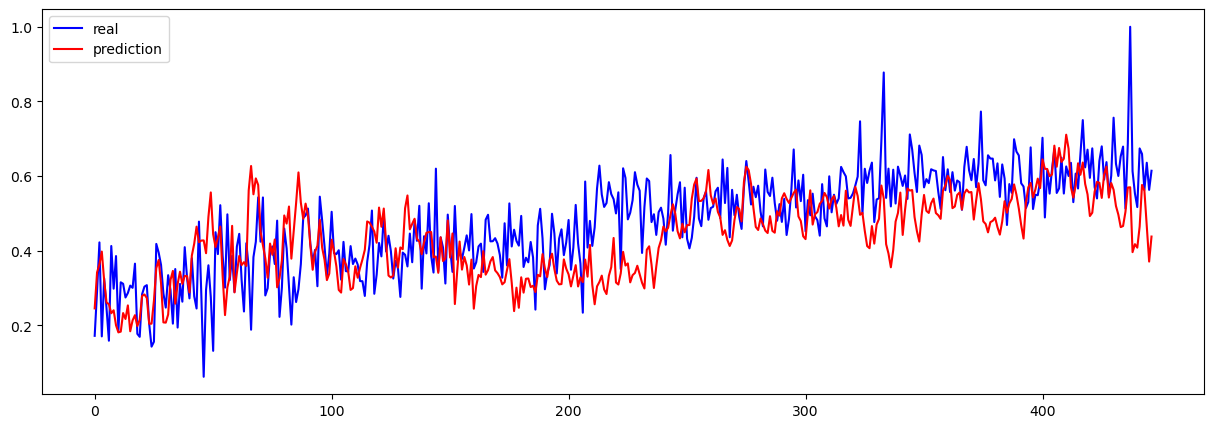

In [15]:
preds = model.predict(X_test)

plt.figure(figsize=(15,5))
plt.plot(y_test, 'b', label='real')
plt.plot(y_pred, 'r', label='prediction')

plt.legend(loc="best")

#for saving figures
#plt.savefig('CPALL_graph.png')
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_percentage_error
# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Convert MAPE to accuracy
accuracy = 100 - mape

print("Accuracy:", accuracy, "%")

Accuracy: 78.44728616609231 %


In [17]:
# Define a function to denormalize data
def denormalize(data, min_val, max_val):
    return data * (max_val - min_val) + min_val

# Get the min and max values used for scaling
min_vals = sc.data_min_
max_vals = sc.data_max_

# Denormalize X_train and X_test
X_train_denorm = np.zeros_like(X_train)
X_test_denorm = np.zeros_like(X_test)

# Denormalize each feature separately
for i in range(X_train.shape[-1]):
    X_train_denorm[:,:,i] = denormalize(X_train[:,:,i], min_vals[i], max_vals[i])
    X_test_denorm[:,:,i] = denormalize(X_test[:,:,i], min_vals[i], max_vals[i])

# Denormalize y_train and y_test
y_train_denorm = denormalize(y_train, sc.data_min_[-1], sc.data_max_[-1])
y_test_denorm = denormalize(y_test, sc.data_min_[-1], sc.data_max_[-1])
preds_denorm = denormalize(preds, sc.data_min_[-1], sc.data_max_[-1])

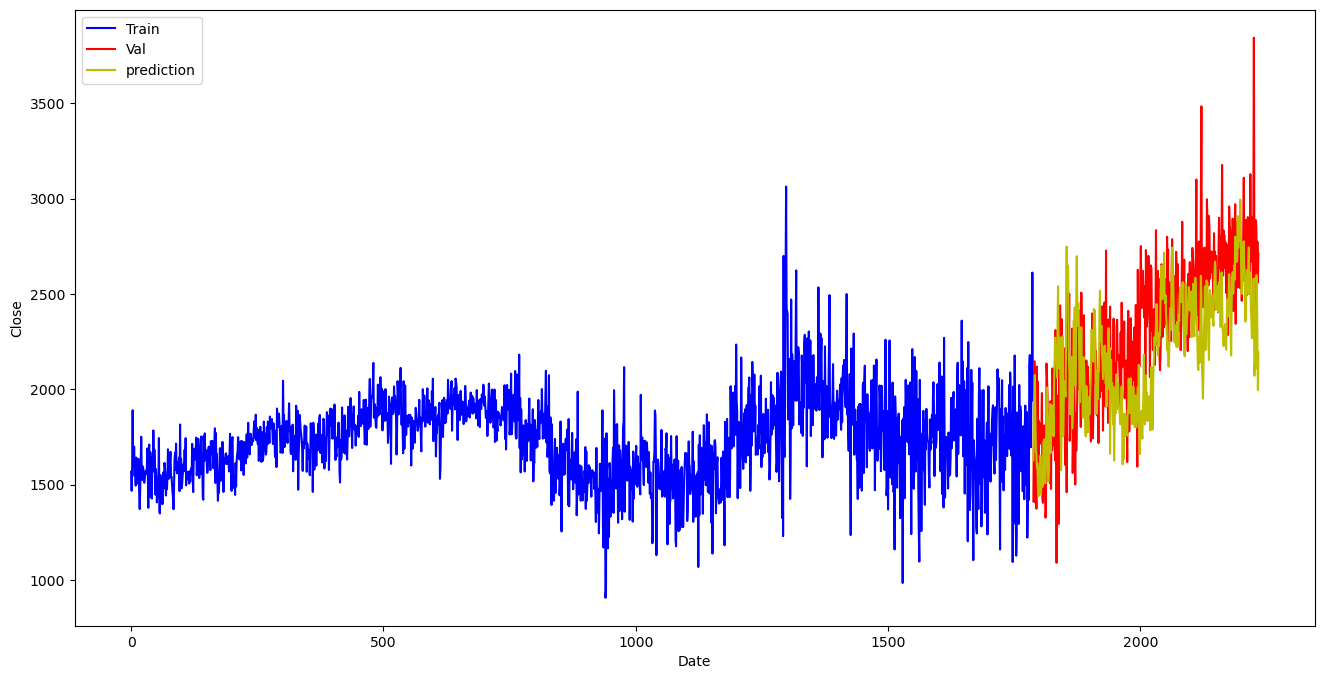

In [18]:
plt.figure(figsize=(16,8))
# plt.title('MSE: {}'.format(trainScore[0]), color="white")
plt.plot(y_train_denorm,'b',label='Train')
plt.plot(range(len(y_train_denorm), len(y_train_denorm) + len(y_test_denorm)),y_test_denorm ,'r', label='Val')
plt.plot(range(len(y_train_denorm), len(y_train_denorm) + len(preds_denorm)),preds_denorm, 'y', label='prediction')

plt.legend(loc="best")
plt.xlabel('Date')
plt.ylabel('Close')
#for saving figures
#plt.savefig('CPALL_graph.png')
plt.show()

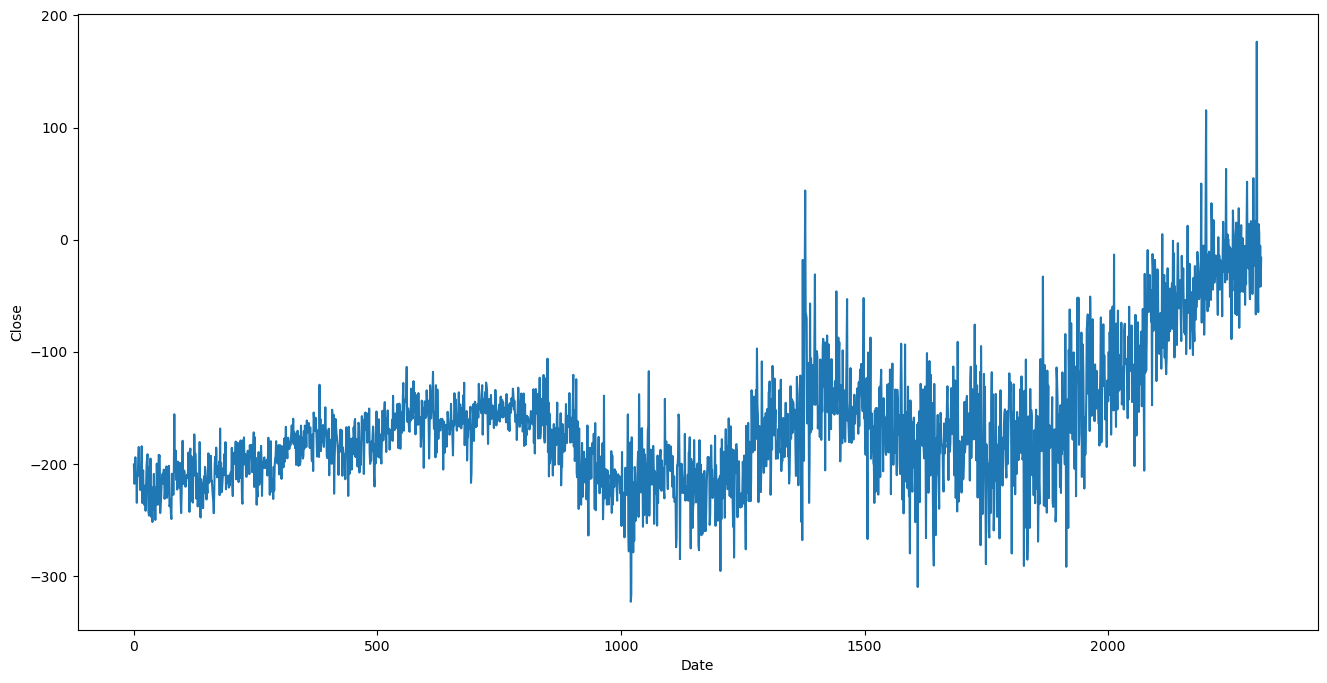

In [19]:
plt.figure(figsize=(16,8))
df=pd.DataFrame(data['Target'])
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()